# **Salary Prediction**

In [5]:
!pip install -q streamlit streamlit-lottie plotly joblib pandas numpy pyngrok joblib setuptools

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
# Importing Data
df = pd.read_csv('Salary_Data.csv')
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

Dataset shape: (30, 2)

First 5 rows:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

Last 5 rows:
    YearsExperience    Salary
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [9]:
# Data Information
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [10]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
YearsExperience    0
Salary             0
dtype: int64


In [11]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


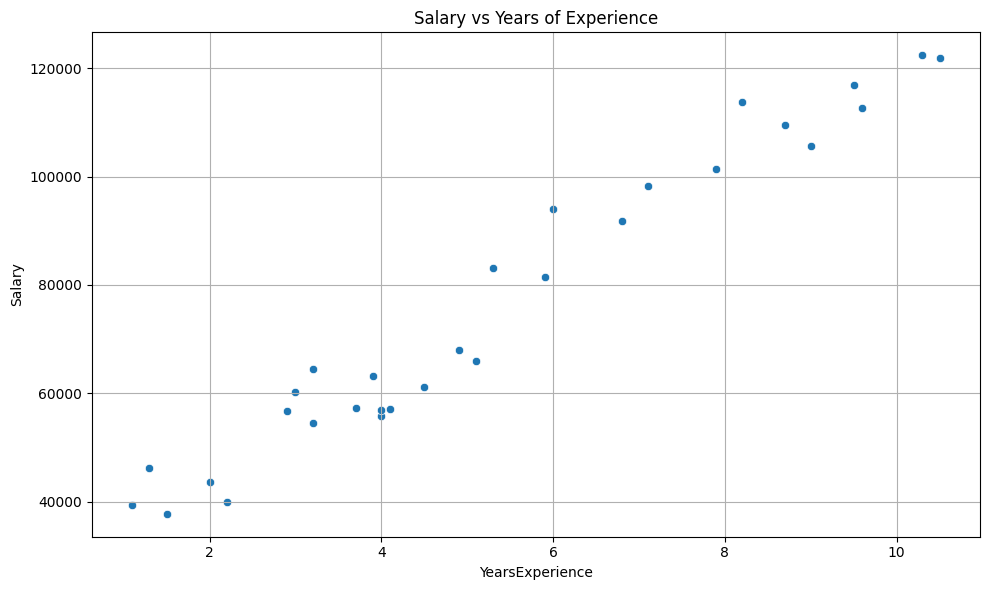

In [12]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Salary vs Years of Experience')
plt.grid(True)
plt.tight_layout()
plt.show()

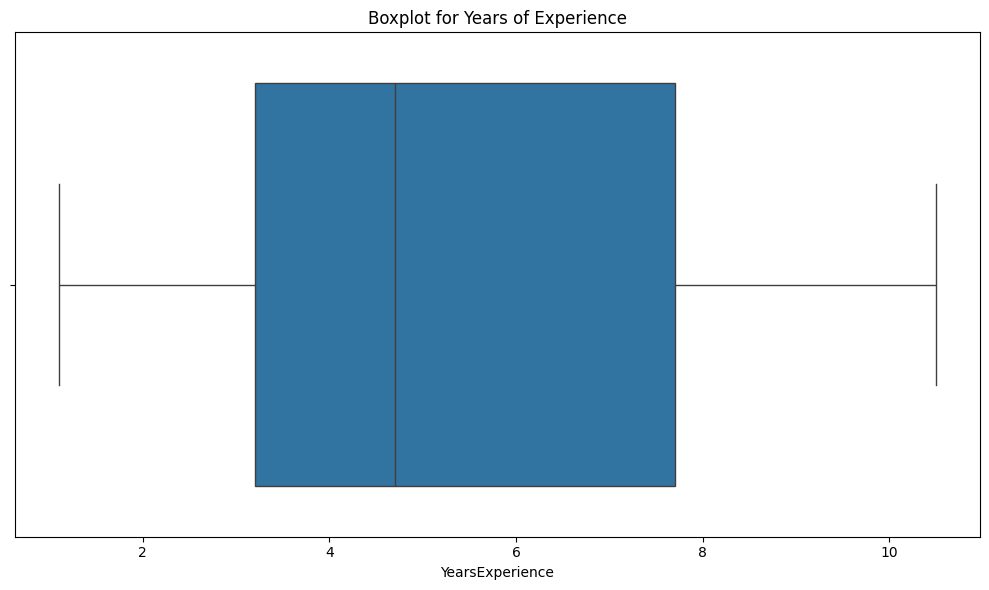

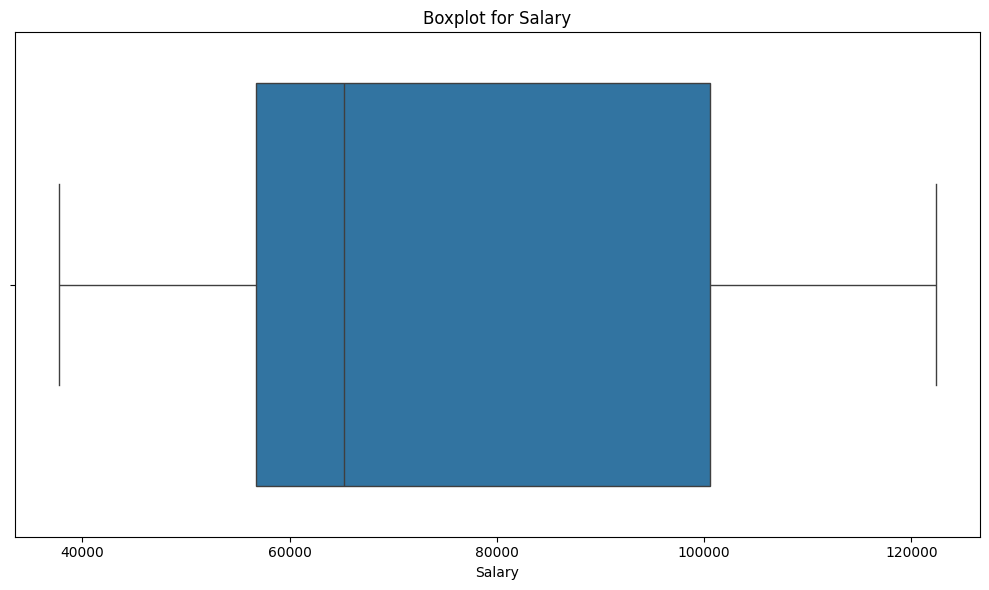

In [13]:
# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['YearsExperience'])
plt.title('Boxplot for Years of Experience')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Salary'])
plt.title('Boxplot for Salary')
plt.tight_layout()
plt.show()

In [15]:
# Define features and target
X = df[['YearsExperience']]
y = df['Salary']

In [16]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [18]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [21]:
# Evaluation Function
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Evaluation:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
    return {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

In [22]:
# Evaluate models
lr_metrics = evaluate_model("Linear Regression", y_test, y_pred_lr)
rf_metrics = evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Evaluation:
MAE: 6286.45
MSE: 49830096.86
RMSE: 7059.04
R2 Score: 0.90

Random Forest Evaluation:
MAE: 6872.01
MSE: 63721129.71
RMSE: 7982.55
R2 Score: 0.88


In [23]:
# Compare models
metrics_df = pd.DataFrame([lr_metrics, rf_metrics])
metrics_df.index = ['Linear Regression', 'Random Forest']
print("\nModel Comparison:")
print(metrics_df)


Model Comparison:
                           MAE           MSE         RMSE        R2
Linear Regression  6286.453831  4.983010e+07  7059.043622  0.902446
Random Forest      6872.007671  6.372113e+07  7982.551579  0.875251


<Figure size 1200x600 with 0 Axes>

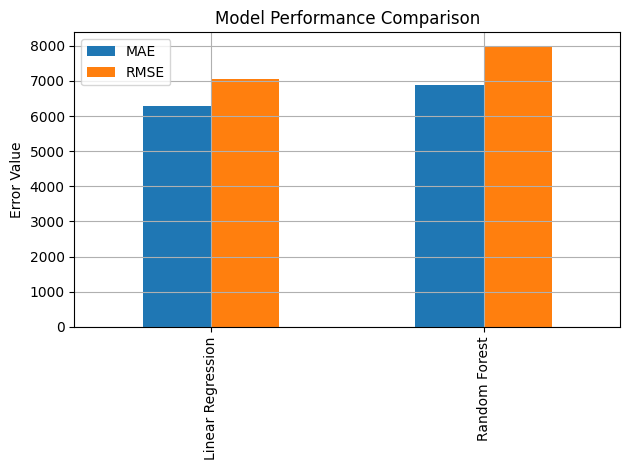

In [26]:
# Visualize model performance
plt.figure(figsize=(12, 6))
metrics_df[['MAE', 'RMSE']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Error Value')
plt.grid(True)
plt.tight_layout()
plt.show()

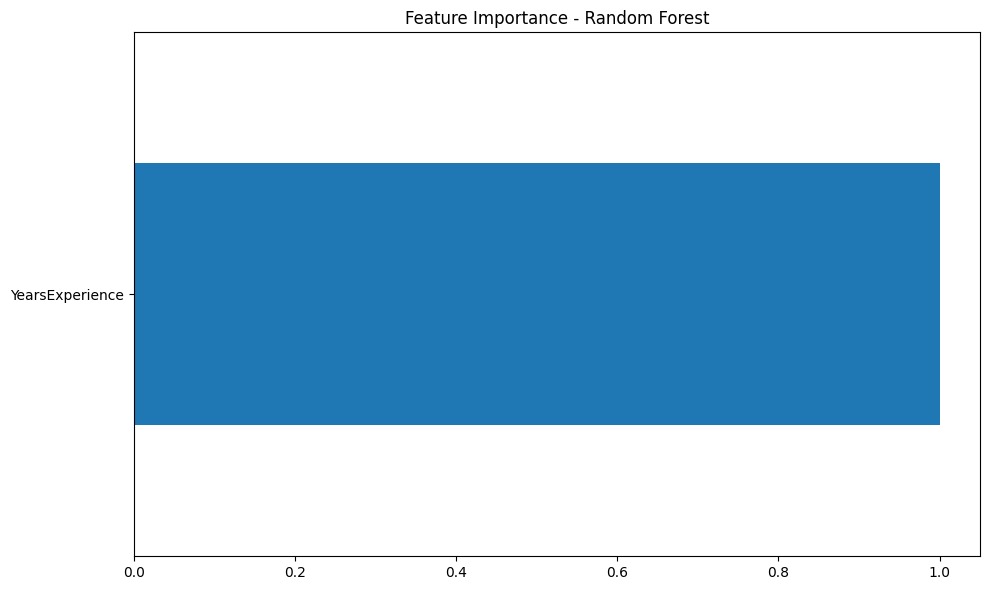

In [27]:
# Feature importance for Random Forest
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [30]:
# Save the best model (based on R2 score)
best_model_name = metrics_df['R2'].idxmax()
print(f"\nBest performing model: {best_model_name}")
if best_model_name == 'Linear Regression':
    best_model = lr_model
else:
    best_model = rf_model
joblib.dump(best_model, "best_salary_model.joblib")


Best performing model: Linear Regression


['best_salary_model.joblib']

In [31]:
from pyngrok import ngrok
from pyngrok import ngrok
from google.colab import userdata
# Kill previous tunnels (if any)
!pkill streamlit
# Authenticate ngrok using the authtoken from Colab secrets
NGROK_AUTH_TOKEN = userdata.get("NGROK_AUTH_TOKEN")
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [32]:
# Set up tunnel
public_url = ngrok.connect(8501)
print(f"🌐 Public URL: {public_url}")
# Launch Streamlit
!streamlit run app.py &

🌐 Public URL: NgrokTunnel: "https://6e595ad76049.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.232.173.161:8501

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted